In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import csv
with open('RAW_DDDT.CSV') as csv_file:
    csv_read=csv.reader(csv_file, delimiter=',')

import pandas as pd
data = pd.read_csv('RAW_DDDT.CSV')
df = pd.DataFrame(data)

Y = df['CONDITION']

e = []
for elem in df:
    e.append(elem)

In [ ]:
data["Condition"] = data.CONDITION.map({"H":0, "D":5})
data.drop("CONDITION", axis = 1,inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(data)
df1_scaled = pd.DataFrame(X, columns=e)
df1_scaled

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,CONDITION
0,0.25,0.75,0.00,0.00,0.00,0.00,0.00,0.75,0.25,0.50,0.00,0.00,0.0
1,0.25,0.50,0.25,0.00,0.00,0.00,0.25,0.75,0.00,0.00,0.00,0.50,0.0
2,0.00,0.50,0.00,0.25,0.00,0.00,0.25,0.50,0.50,0.00,0.25,0.25,0.0
3,0.25,0.75,0.25,0.50,0.25,0.25,0.50,0.75,0.25,0.75,0.50,0.75,0.0
4,0.00,0.25,0.00,0.00,0.25,0.25,0.50,0.00,0.00,0.00,0.00,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.00,0.75,1.0
982,0.00,0.25,0.00,0.00,0.00,0.00,0.25,0.25,0.00,0.25,0.00,0.00,1.0
983,0.25,0.25,0.00,0.00,0.00,0.00,0.25,0.25,0.00,0.00,0.00,0.25,1.0
984,0.00,0.50,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,0.25,1.0


In [ ]:
honest = df1_scaled[df1_scaled['CONDITION'] == 0]
honest = honest.iloc[:,:12]
dishonest = df1_scaled[df1_scaled['CONDITION'] == 1]
dishonest = dishonest.iloc[:,:12]
honest

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12
0,0.25,0.75,0.00,0.00,0.00,0.00,0.00,0.75,0.25,0.50,0.00,0.00
1,0.25,0.50,0.25,0.00,0.00,0.00,0.25,0.75,0.00,0.00,0.00,0.50
2,0.00,0.50,0.00,0.25,0.00,0.00,0.25,0.50,0.50,0.00,0.25,0.25
3,0.25,0.75,0.25,0.50,0.25,0.25,0.50,0.75,0.25,0.75,0.50,0.75
4,0.00,0.25,0.00,0.00,0.25,0.25,0.50,0.00,0.00,0.00,0.00,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.25,0.00,0.25,0.00,0.00,0.00,0.25,0.75,0.00,0.75,0.00,0.50
489,0.00,0.50,0.00,0.50,0.00,0.00,0.50,0.75,0.00,0.50,0.00,0.00
490,0.50,0.00,0.50,0.00,0.25,0.00,0.00,0.00,0.00,0.50,0.00,0.25
491,0.75,0.75,0.50,0.50,0.00,0.75,1.00,1.00,0.25,0.75,0.00,0.50


In [ ]:
honest = np.array(honest)
dishonest = np.array(dishonest)

In [ ]:
comp = np.zeros((493,12))
for i in range(0, honest.shape[0]):
  for j in range(0, honest.shape[1]):
    if j == 0:      # We consider that the first question is different from the others (Faking here implies giving an higher score)
      if honest[i][j] == dishonest[i][j]:
        comp[i][j] = 0
      elif honest[i][j] > dishonest[i][j]:
        comp[i][j] = 1
      else:
        comp[i][j] = -1
    else:
      if honest[i][j] == dishonest[i][j]:
        comp[i][j] = 0
      elif honest[i][j] < dishonest[i][j]:
        comp[i][j] = 1
      else:
        comp[i][j] = -1

print(comp[-1:])

[[ 0. -1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]]


In [56]:
unchanged = np.zeros(493,)
for item in range(len(comp)):
  unchanged[item] = np.sum(comp[item,:]== -1)

In [ ]:
tf = np.zeros((honest.shape[0], honest.shape[1]))

for column in range(honest.shape[1]):
  for row in range(honest.shape[0]):
    tf[row][column] = (np.sum(honest[:,column]==honest[row][column])/(honest.shape[0])) * np.log10(honest.shape[1]/(np.sum(honest==honest[row][column])))

In [ ]:
tf1 = np.zeros((honest.shape[0], honest.shape[1]))

for column in range(honest.shape[1]):
  for row in range(honest.shape[0]):
    tf1[row][column] = (np.sum(dishonest[:,column]==dishonest[row][column])/(dishonest.shape[0])) * np.log10(dishonest.shape[1]/(np.sum(dishonest==dishonest[row][column])))

In [ ]:
tfidf_honest = pd.DataFrame(tf,columns=e[0:12])
tfidf_honest

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12
0,-0.991723,-0.725982,-0.855271,-0.698180,-1.103997,-0.903271,-0.349090,-0.869582,-0.781092,-0.478669,-0.798544,-0.589090
1,-0.991723,-0.598337,-0.728434,-0.698180,-1.103997,-0.903271,-0.566072,-0.869582,-0.951270,-0.440726,-0.798544,-0.418836
2,-0.427635,-0.598337,-0.855271,-0.596789,-1.103997,-0.903271,-0.566072,-0.470691,-0.231357,-0.440726,-0.618730,-0.745986
3,-0.991723,-0.725982,-0.728434,-0.366980,-0.706493,-0.719657,-0.514569,-0.869582,-0.781092,-0.454736,-0.299168,-0.303157
4,-0.427635,-0.399322,-0.855271,-0.698180,-0.706493,-0.719657,-0.514569,-0.157091,-0.951270,-0.440726,-0.798544,-0.745986
...,...,...,...,...,...,...,...,...,...,...,...,...
488,-0.991723,-0.144000,-0.728434,-0.698180,-1.103997,-0.903271,-0.566072,-0.869582,-0.951270,-0.454736,-0.798544,-0.418836
489,-0.427635,-0.598337,-0.855271,-0.366980,-1.103997,-0.903271,-0.514569,-0.869582,-0.951270,-0.478669,-0.798544,-0.589090
490,-0.366980,-0.144000,-0.279224,-0.698180,-0.706493,-0.903271,-0.349090,-0.157091,-0.951270,-0.478669,-0.798544,-0.745986
491,-0.255290,-0.725982,-0.279224,-0.366980,-1.103997,-0.187479,-0.077162,-0.167628,-0.781092,-0.454736,-0.798544,-0.418836


In [ ]:
tfidf_dishonest = pd.DataFrame(tf1,columns=e[0:12])
tfidf_dishonest

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12
0,-0.312364,-0.427371,-1.864112,-1.643361,-0.364773,-0.326599,-0.357310,-0.231269,-1.869017,-0.712579,-1.962223,-0.873758
1,-0.312364,-0.924656,-1.864112,-1.643361,-1.761095,-1.864112,-0.357310,-0.231269,-0.330840,-0.712579,-1.962223,-0.873758
2,-0.436879,-0.924656,-0.339323,-0.407188,-0.364773,-0.326599,-0.691371,-0.623507,-1.869017,-0.712579,-0.246009,-0.873758
3,-0.386347,-0.050393,-0.036395,-0.058792,-0.045540,-0.036395,-0.108126,-0.231269,-0.033038,-0.072084,-0.042049,-0.060070
4,-0.312364,-0.924656,-1.864112,-1.643361,-1.761095,-1.864112,-0.691371,-0.623507,-1.869017,-0.072084,-1.962223,-0.976206
...,...,...,...,...,...,...,...,...,...,...,...,...
488,-0.436879,-0.924656,-1.864112,-1.643361,-1.761095,-1.864112,-0.883000,-0.549422,-0.330840,-0.712579,-1.962223,-0.060070
489,-0.470933,-0.924656,-1.864112,-1.643361,-1.761095,-1.864112,-0.691371,-0.623507,-1.869017,-0.712579,-1.962223,-0.976206
490,-0.436879,-0.924656,-1.864112,-1.643361,-1.761095,-1.864112,-0.691371,-0.623507,-1.869017,-1.039978,-1.962223,-0.873758
491,-0.470933,-0.427371,-1.864112,-1.643361,-1.761095,-1.864112,-0.357310,-0.497432,-1.869017,-1.039978,-1.962223,-0.873758


In [ ]:
model_dict = {"PSY": ["P1", "P3", "P5", "P10"], "NAR": ["N2", "N7", "N8", "N12"], "MAC": ["M4", "M6", "M9", "M11"]}

In [ ]:
x = tfidf_honest.loc[:, model_dict['PSY']]
y = tfidf_honest.loc[:, model_dict['NAR']]
z = tfidf_honest.loc[:, model_dict['MAC']]

coord = np.array([x.mean(axis=1),y.mean(axis=1),z.mean(axis=1)]).T

In [ ]:
x = tfidf_dishonest.loc[:, model_dict['PSY']]
y = tfidf_dishonest.loc[:, model_dict['NAR']]
z = tfidf_dishonest.loc[:, model_dict['MAC']]

coord1 = np.array([x.mean(axis=1),y.mean(axis=1),z.mean(axis=1)]).T

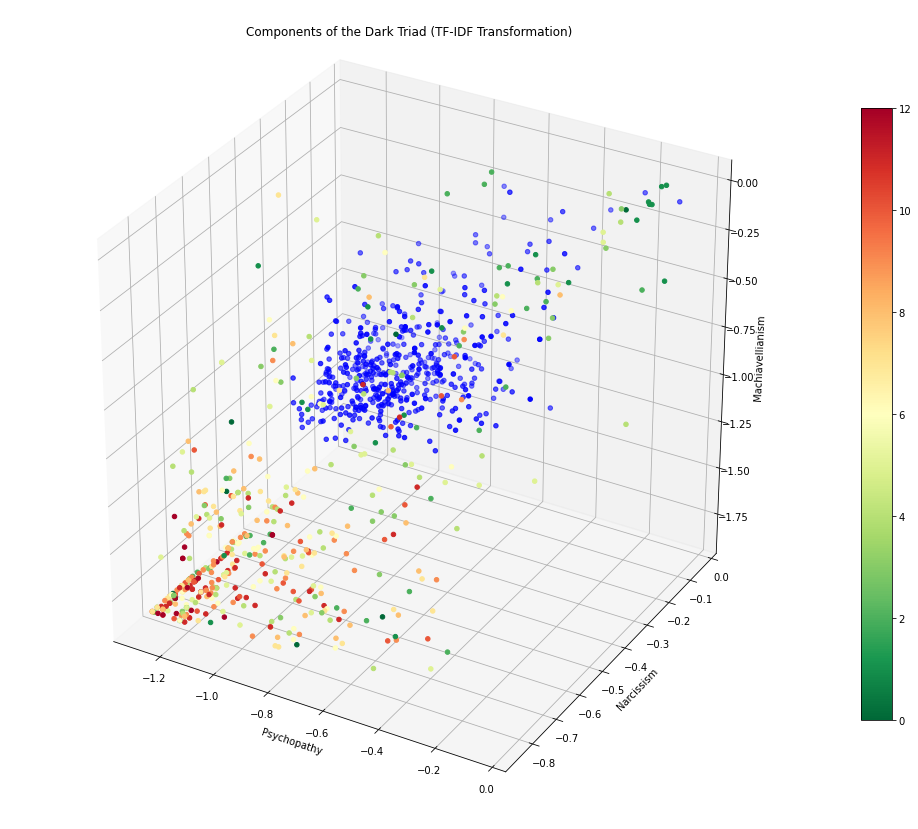

In [58]:
from mpl_toolkits import mplot3d

x = coord[:,0]
y = coord[:,1]
z = coord[:,2]

x1 = coord1[:,0]
y1 = coord1[:,1]
z1 = coord1[:,2]

fig = plt.figure(figsize = (18, 15))
ax = plt.axes(projection ="3d")

ax.scatter3D(x, y, z, c='b', marker='o', label='Honest')
points=ax.scatter3D(x1, y1, z1, c=unchanged, marker='o', cmap='RdYlGn_r', alpha=1)
fig.colorbar(points, shrink=0.75)

ax.set_xlabel('Psychopathy')
ax.set_ylabel('Narcissism')
ax.set_zlabel('Machiavellianism')
plt.title('Components of the Dark Triad (TF-IDF Transformation)\n\n')
# plt.legend(loc='best')
plt.show()